In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("fraud_dataset.csv")

In [4]:
print(df.shape)
df.head()

(10000, 10)


,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [5]:
df.info()
df.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,4,5,6,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,POS,Food,US,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2568,2023,2050,NaN,NaN,NaN,NaN
mean,4999.50000,500.058700,178.142763,NaN,NaN,NaN,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,NaN,NaN,NaN,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,NaN,NaN,NaN,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,NaN,NaN,NaN,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,NaN,NaN,NaN,19.000000,0.234939,0.236968,0.000000


In [6]:
missing_values = df.isna().sum().sort_values(ascending=False)
print(missing_values)

transaction_id       0
user_id              0
amount               0
transaction_type     0
merchant_category    0
country              0
hour                 0
device_risk_score    0
ip_risk_score        0
is_fraud             0
dtype: int64


In [7]:
duplicate_count = df.duplicated().sum()
print("Duplicate rows:", duplicate_count)

Duplicate rows: 0


In [8]:
# Amount should be > 0
invalid_amount = (df["amount"] <= 0).sum()
print("Invalid amount rows (<=0):", invalid_amount)

Invalid amount rows (<=0): 0


In [9]:
# Hour should be 0–23
invalid_hour = ((df["hour"] < 0) | (df["hour"] > 23)).sum()
print("Invalid hour rows:", invalid_hour)

Invalid hour rows: 0


In [10]:
# Risk scores should be 0–1
invalid_device = ((df["device_risk_score"] < 0) | (df["device_risk_score"] > 1)).sum()
invalid_ip = ((df["ip_risk_score"] < 0) | (df["ip_risk_score"] > 1)).sum()
print("Invalid device_risk_score rows:", invalid_device)
print("Invalid ip_risk_score rows:", invalid_ip)

Invalid device_risk_score rows: 0
Invalid ip_risk_score rows: 0


In [11]:
# is_fraud should be 0 or 1
invalid_fraud = (~df["is_fraud"].isin([0, 1])).sum()
print("Invalid is_fraud rows:", invalid_fraud)

Invalid is_fraud rows: 0


In [12]:
print("Final shape:", df.shape)
df.info()

Final shape: (10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


#### Visualization 1 - Histogram

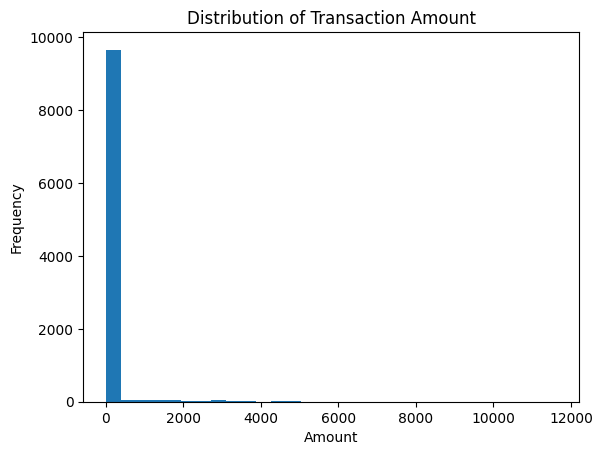

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(df["amount"], bins=30)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

#### Visualization 2 - Box Plot

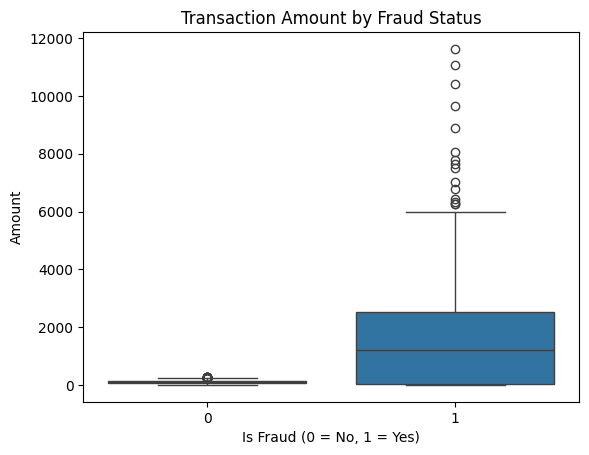

In [14]:
sns.boxplot(x="is_fraud", y="amount", data=df)
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Amount")
plt.show()

#### Visualization 3 - Bar Plot

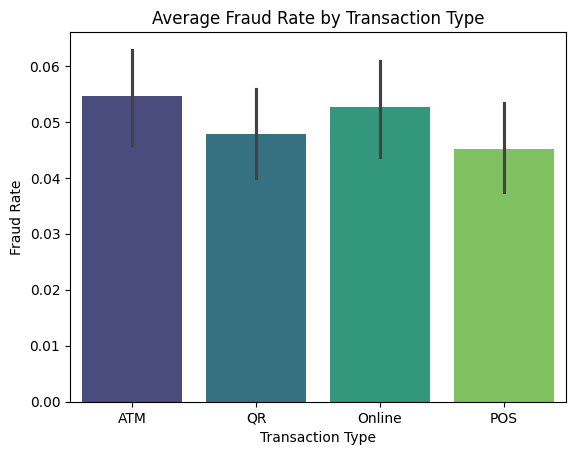

In [15]:
sns.barplot(data=df, x="transaction_type", y="is_fraud",hue='transaction_type', palette='viridis')
plt.title("Average Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

#### Visualization 4 - Bar Plot

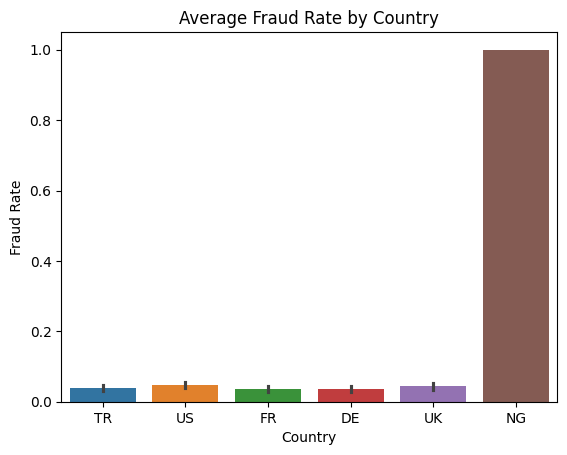

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x="country", y="is_fraud", hue='country')
plt.title("Average Fraud Rate by Country")
plt.xlabel("Country")
plt.ylabel("Fraud Rate")
plt.show()

#### Visualization 5- Scatterplot

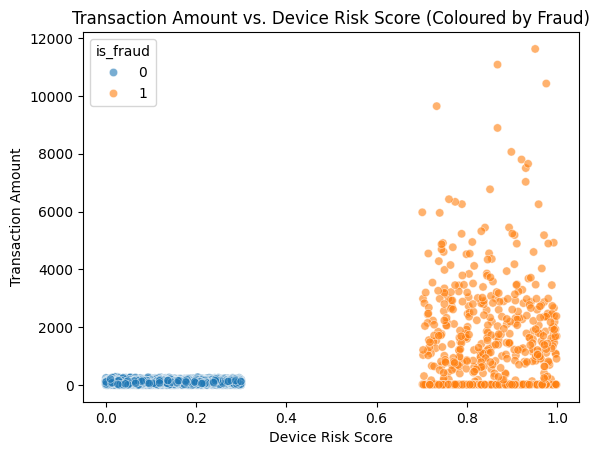

In [20]:
sns.scatterplot(data=df, x="device_risk_score", y="amount", alpha = 0.6, hue='is_fraud')
plt.title("Transaction Amount vs. Device Risk Score (Coloured by Fraud)")
plt.xlabel("Device Risk Score")
plt.ylabel("Transaction Amount")
plt.show()